In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("data/train.csv")

In [145]:
df = pd.DataFrame(data)

In [ ]:
# 資料理解（Data Understanding）

In [163]:
# 檢視數據前幾行
df.head()
# RangeIndex: 7500 entries, 0 to 7499

,Id,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [ ]:
"""
欄位名稱	繁體中文說明
Id	客戶 ID（唯一識別碼）
Home Ownership	房屋持有狀況（Own Home: 自有房產, Rent: 租房, Home Mortgage: 房貸）
Annual Income	年收入（申請人的年度收入）
Years in current job	目前工作的年數（如 10+ years, 5 years, <1 year，需轉換為數值）
Tax Liens	稅務留置權數量（是否因未繳稅款被政府扣押資產）
Number of Open Accounts	開啟的信貸帳戶數量（目前持有的信用卡、貸款數）
Years of Credit History	信用歷史年數（客戶擁有信貸紀錄的總年數）
Maximum Open Credit	最高可用信貸額度（過去曾獲得的最大信貸額度）
Number of Credit Problems	信用問題數量（如遲繳、違約等信用問題的總數）
Months since last delinquent	距離上次違約的月數（若為 0，代表未違約）
Bankruptcies	破產次數（申請人過去申請破產的次數）
Purpose	貸款用途（如 debt con: 債務整合, home im: 房屋裝修, other: 其他）
Term	貸款期限（Short: 短期貸款, Long: 長期貸款）
Current Loan Amount	目前貸款金額（客戶當前貸款的總金額）
Current Credit Balance	當前信用卡/貸款餘額（未償還的信貸餘額）
Monthly Debt	每月負債（申請人每月的貸款或信用卡還款額）
Credit Score	信用評分（數值型變數，影響違約風險）
Credit Default	是否違約（0=未違約，1=違約）（目標變數，分類問題）
"""

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            7500 non-null   int64  
 1   Home Ownership                7500 non-null   object 
 2   Annual Income                 5943 non-null   float64
 3   Years in current job          7129 non-null   object 
 4   Tax Liens                     7500 non-null   float64
 5   Number of Open Accounts       7500 non-null   float64
 6   Years of Credit History       7500 non-null   float64
 7   Maximum Open Credit           7500 non-null   float64
 8   Number of Credit Problems     7500 non-null   float64
 9   Months since last delinquent  3419 non-null   float64
 10  Bankruptcies                  7486 non-null   float64
 11  Purpose                       7500 non-null   object 
 12  Term                          7500 non-null   object 
 13  Cur

In [151]:
df.isnull().sum()

Id                                 0
Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

In [158]:
df_num = df.select_dtypes(include=['number'])
# df_num.corr()

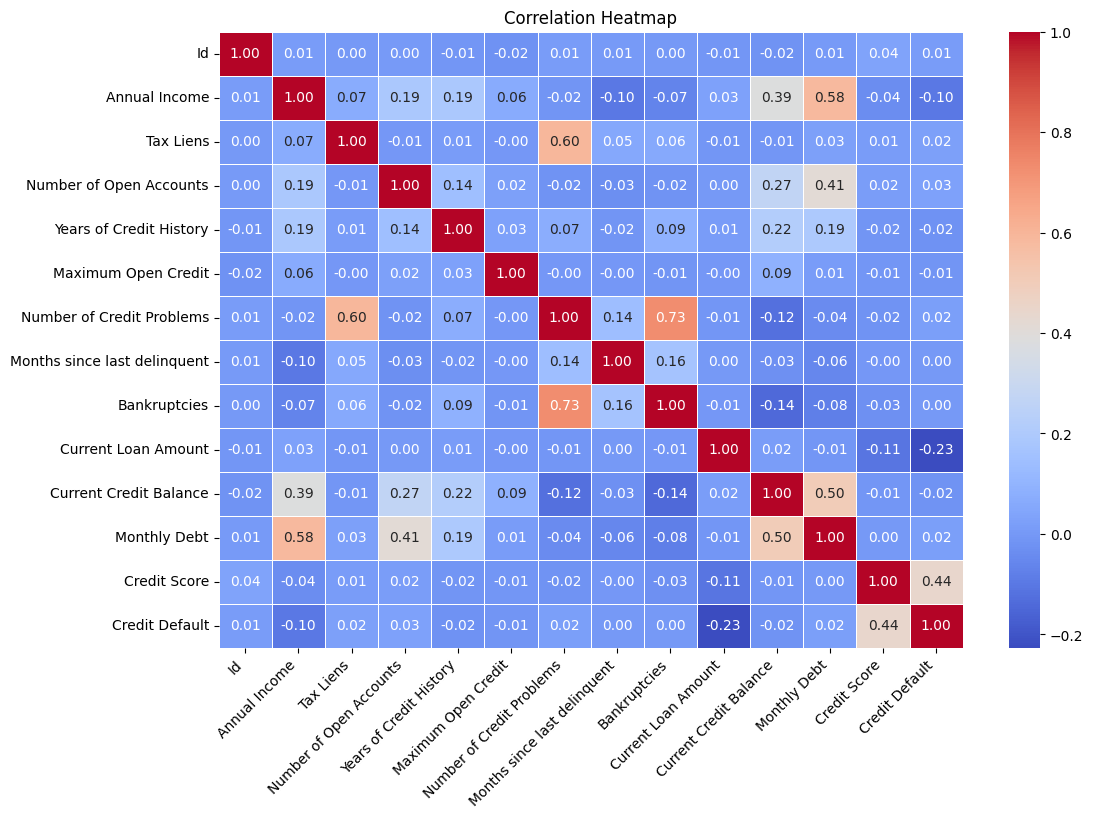

In [165]:
# 熱圖
plt.figure(figsize=(12, 8))
sns.heatmap(df_num.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.xticks(rotation=45, ha="right")
plt.title("Correlation Heatmap")
plt.show()

In [152]:
## 找出類別型有哪些內容 Home Ownership、Years in current job
df_object = df.select_dtypes(include=['object'])
df_object

,Home Ownership,Years in current job,Purpose,Term
0,Own Home,NaN,debt consolidation,Short Term
1,Own Home,10+ years,debt consolidation,Long Term
2,Home Mortgage,8 years,debt consolidation,Short Term
3,Own Home,6 years,debt consolidation,Short Term
4,Rent,8 years,debt consolidation,Short Term
...,...,...,...,...
7495,Rent,< 1 year,other,Short Term
7496,Home Mortgage,1 year,debt consolidation,Long Term
7497,Rent,6 years,buy a car,Short Term
7498,Home Mortgage,NaN,debt consolidation,Short Term


In [166]:
# 類別名稱與內容
for i in range(len(df_object.columns)):  
    col_name = df_object.columns[i]  # 取得欄位名稱
    print("名稱:", col_name)
    print("各類名稱:", df[col_name].unique())
    print("類別數量:", df[col_name].nunique())
    print("缺失值:", df[col_name].isnull().sum())
    print("型態:", df[col_name].dtype)
    print("--" * 30)

名稱: Home Ownership
各類名稱: ['Own Home' 'Home Mortgage' 'Rent' 'Have Mortgage']
類別數量: 4
缺失值: 0
型態: object
------------------------------------------------------------
名稱: Years in current job
各類名稱: [nan '10+ years' '8 years' '6 years' '7 years' '5 years' '1 year'
 '< 1 year' '4 years' '3 years' '2 years' '9 years']
類別數量: 11
缺失值: 371
型態: object
------------------------------------------------------------
名稱: Purpose
各類名稱: ['debt consolidation' 'other' 'home improvements' 'take a trip'
 'buy a car' 'small business' 'business loan' 'wedding'
 'educational expenses' 'buy house' 'medical bills' 'moving'
 'major purchase' 'vacation' 'renewable energy']
類別數量: 15
缺失值: 0
型態: object
------------------------------------------------------------
名稱: Term
各類名稱: ['Short Term' 'Long Term']
類別數量: 2
缺失值: 0
型態: object
------------------------------------------------------------


In [21]:
from scipy.stats import chi2_contingency

# 以 Home Ownership 為例，創建列聯表
contingency_table = pd.crosstab(df['Home Ownership'], df['Credit Default'])

# 進行卡方檢定
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 顯示結果
print(f"Chi-square: {chi2}")
print(f"P-value: {p}")

# 判斷相關性
if p < 0.05:
    print("Home Ownership 與 Credit Default 具有統計顯著關聯")
else:
    print("Home Ownership 與 Credit Default 無顯著關聯")


Chi-square: 33.0746470533313
P-value: 3.105993372272127e-07
Home Ownership 與 Credit Default 具有統計顯著關聯


In [22]:
df["Purpose"].value_counts()
# df["Term"]

Purpose
debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: count, dtype: int64

In [87]:
# 數值化 Purpose（貸款用途）
purpose_mapping = {
    'debt consolidation': 1,
    'other': 2,
    'home improvements': 3,
    'business loan': 4,
    'buy a car': 5,
    'medical bills': 6,
    'major purchase': 7,
    'take a trip': 8,
    'buy house': 9,
    'small business': 10,
    'wedding': 11,
    'moving': 12,
    'educational expenses': 13,
    'vacation': 14,
    'renewable energy': 15
}

df['Purpose'] = df['Purpose'].map(purpose_mapping)

In [23]:
df["Term"].value_counts()

Term
Short Term    5556
Long Term     1944
Name: count, dtype: int64

In [88]:
# 數值化 Term（貸款期限）
term_mapping = {
    'Short Term': 0,
    'Long Term': 1
}

df['Term'] = df['Term'].map(term_mapping)

In [36]:
# 年收入欄位物件 有哪些內容 
print(df["Annual Income"].unique())
# 年收入欄位物件，各數量
print(df["Annual Income"].nunique())
# 年收入欄位，缺失值
print(df["Annual Income"].isnull().sum())
# 年收入欄位，型態
print(df["Annual Income"].dtypes)

[ 482087. 1025487.  751412. ... 2833185. 1257610.  402192.]
5478
1557
float64


In [61]:
# 工作年資欄位物件 有哪些內容 
print(df["Years in current job"].unique())
# 工作年資欄位物件，各數量
print(df["Years in current job"].nunique())
# 工作年資欄位，缺失值
print(df["Years in current job"].isnull().sum())
# 工作年資欄位，型態
print(df["Years in current job"].dtypes)

[nan '10+ years' '8 years' '6 years' '7 years' '5 years' '1 year'
 '< 1 year' '4 years' '3 years' '2 years' '9 years']
11
371
object


In [62]:
# 先將 Years in current job 數值化
job_mapping = {
    '< 1 year': 0.5,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}

# 應用數值轉換
df['Years in current job'] = df['Years in current job'].map(job_mapping)

# 先檢查有多少 NaN
print(df['Years in current job'].isnull().sum())


371


In [63]:
# # 計算與 Credit Default 的相關係數
df[['Years in current job', 'Credit Default']].corr()

,Years in current job,Credit Default
Years in current job,1.000000,-0.004324
Credit Default,-0.004324,1.000000


In [78]:
df['Years in current job'].value_counts()
df['Years in current job'].describe()

count    7129.000000
mean        5.919834
std         3.557921
min         0.500000
25%         3.000000
50%         6.000000
75%        10.000000
max        10.000000
Name: Years in current job, dtype: float64

In [79]:
# 補中位數
df['Years in current job'].fillna(df['Years in current job'].median(), inplace=True)

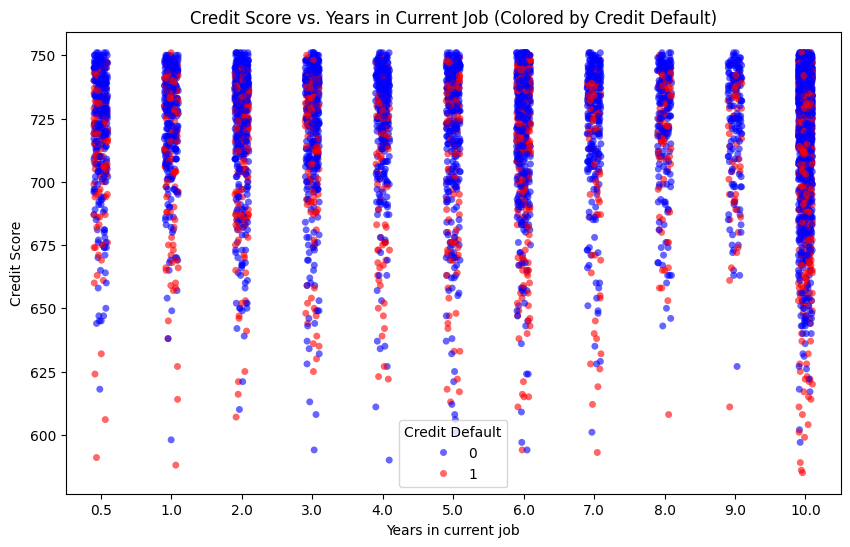

In [85]:
# 適合數據類型
plt.figure(figsize=(10, 6))
sns.stripplot(
    data=df, x="Years in current job", y="Credit Score",
    hue="Credit Default", palette={0: "blue", 1: "red"},
    jitter=True, alpha=0.6
)
plt.title("Credit Score vs. Years in Current Job (Colored by Credit Default)")
plt.show()

In [86]:
df.groupby('Years in current job')['Credit Default'].mean()

Years in current job
0.5     0.282416
1.0     0.281746
2.0     0.273759
3.0     0.274194
4.0     0.279318
5.0     0.281008
6.0     0.327478
7.0     0.280303
8.0     0.271386
9.0     0.250965
10.0    0.276158
Name: Credit Default, dtype: float64

In [29]:
df["Tax Liens"].unique()

array([0., 3., 1., 2., 4., 6., 5., 7.])

In [30]:
df["Tax Liens"].nunique()

8

In [14]:
df["Tax Liens"].dtypes

dtype('float64')

In [16]:
df["Tax Liens"].value_counts()

Tax Liens
0.0    7366
1.0      83
2.0      30
3.0      10
4.0       6
6.0       2
5.0       2
7.0       1
Name: count, dtype: int64

In [15]:

df[["Tax Liens","Credit Default","Credit Score","Annual Income"]].corr()

,Tax Liens,Credit Default,Credit Score,Annual Income
Tax Liens,1.000000,0.024368,-0.016478,0.066245
Credit Default,0.024368,1.000000,-0.207155,-0.101375
Credit Score,-0.016478,-0.207155,1.000000,0.028571
Annual Income,0.066245,-0.101375,0.028571,1.000000


In [ ]:
# 異常值 、缺失值、欄位物件各內容、欄位物件各數量
1. Home Ownership 房屋持有狀況，為object，無缺失值，有4個類型 'Own Home', 'Home Mortgage', 'Rent', 'Have Mortgage'

2. Annual Income 年收入，為float64，有1577個缺失值，

3. Years in current job 工作年資，為object，有371個缺失值，有11個類型 nan, '10+ years', '8 years', '6 years', '7 years', '5 years',
       '1 year', '< 1 year', '4 years', '3 years', '2 years', '9 years'

4. Tax Liens 稅收留置權，為float64，無缺值，值為0~7，絕大7366部分是0無欠，與評分、違約相關性低 (暫不參考X)

5. 

6. 

7. 

8. 

9. 

10. Current Loan Amount目前貸款金額有99999999.0 的異常值

11. Credit Score 值有問題被區分為1000以下與1000以上，1000以上大概都在6000~7500左右，改完與違約值有關 (加入參考依據)

In [73]:
# 檢視數據總覽
df.info()
# 發現種類 float64(12), int64(2), object(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            7500 non-null   int64  
 1   Home Ownership                7488 non-null   float64
 2   Annual Income                 5943 non-null   float64
 3   Years in current job          7129 non-null   float64
 4   Tax Liens                     7500 non-null   float64
 5   Number of Open Accounts       7500 non-null   float64
 6   Years of Credit History       7500 non-null   float64
 7   Maximum Open Credit           7500 non-null   float64
 8   Number of Credit Problems     7500 non-null   float64
 9   Months since last delinquent  3419 non-null   float64
 10  Bankruptcies                  7486 non-null   float64
 11  Purpose                       7500 non-null   object 
 12  Term                          7500 non-null   object 
 13  Cur

In [11]:
# 檢視數據的統計摘要
df.describe()

,Id,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,7500.000000,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,3749.500000,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,2165.207842,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,0.000000,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,1874.750000,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,3749.500000,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,5624.250000,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,7499.000000,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [5]:
# 檢查缺失值
df.isnull().sum()

Id                                 0
Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

In [ ]:
# 看到缺失值後的思考
# 年收、工作年資、距離上次違約的月數、信用分數

In [76]:
# 年收
df["Annual Income"].describe()
# df["Annual Income"].value_counts()
# df["Annual Income"].isnull().sum()

count    5.943000e+03
mean     1.366392e+06
std      8.453392e+05
min      1.645970e+05
25%      8.443410e+05
50%      1.168386e+06
75%      1.640137e+06
max      1.014934e+07
Name: Annual Income, dtype: float64

In [70]:
correlation = df[["Annual Income", "Credit Default"]].corr()

# 顯示結果
print("📌 相關係數：")
print(correlation)

📌 相關係數：
                Annual Income  Credit Default
Annual Income        1.000000       -0.101375
Credit Default      -0.101375        1.000000


In [71]:
from scipy.stats import spearmanr
spearman_corr, p_value = spearmanr(df["Annual Income"], df["Credit Default"])
print(f"📌 Spearman 相關係數: {spearman_corr:.4f} (p值: {p_value:.4f})")


📌 Spearman 相關係數: nan (p值: nan)


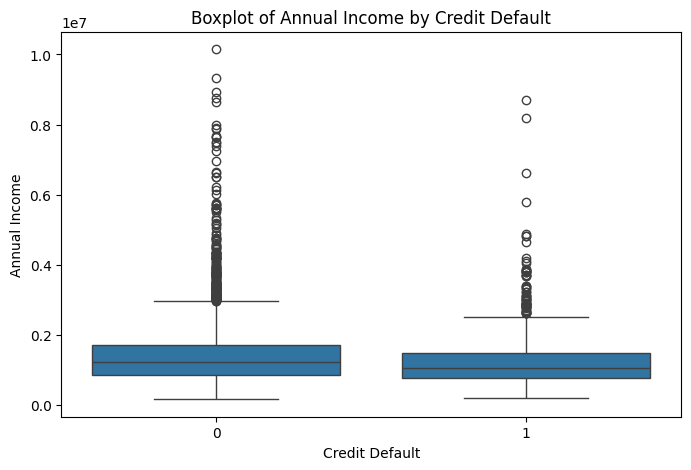

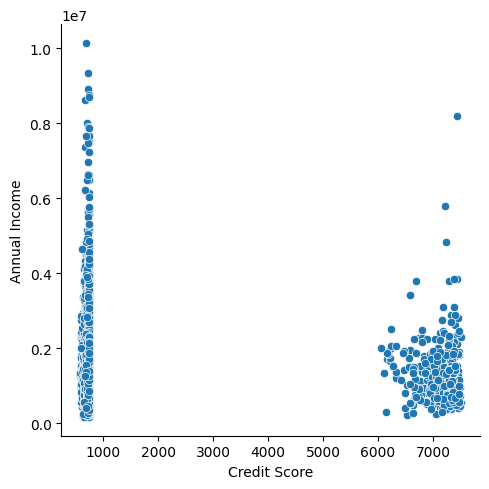

In [8]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Credit Default", y="Annual Income")
plt.title("Boxplot of Annual Income by Credit Default")
plt.show()
sns.relplot(data=df, x="Credit Score", y="Annual Income")
plt.show()

<Axes: xlabel='Credit Default', ylabel='Log Annual Income'>

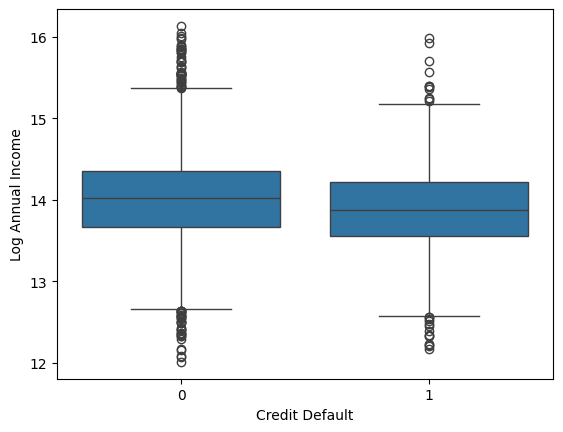

In [74]:
df["Log Annual Income"] = np.log1p(df["Annual Income"])
sns.boxplot(data=df, x="Credit Default", y="Log Annual Income")


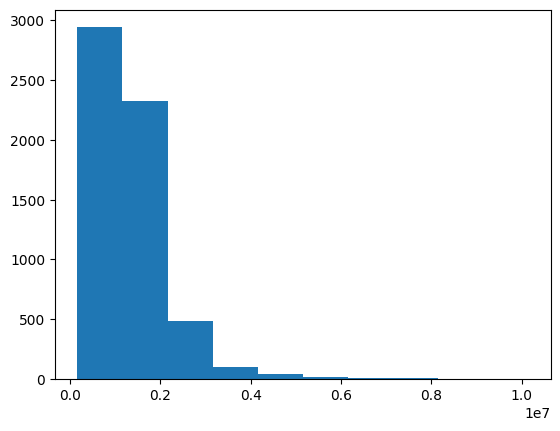

In [16]:
# 直方圖
plt.hist(df["Annual Income"])
plt.show()

In [12]:
# 距離上次違約的月數

# 距離上次違約的月數(數值越高就是離未繳期間將對久，代表改善，nan代表沒有違約過): 
print("獨特值:", df["Months since last delinquent"].unique(),df["Months since last delinquent"].nunique())

# 看一下均值 
print(df["Months since last delinquent"].describe())
print(df["Months since last delinquent"].value_counts())

# 將 nan未違約改為 -1，將缺值補足
df["Months since last delinquent"] = df["Months since last delinquent"].fillna(-1)
print(df["Months since last delinquent"].isnull().sum())

獨特值: [ nan  73.  18.   6.  40.  44.  45.  17.  61.  14.  11.  32.  75.  65.
  10.  28.  35.  29.  13.   8.  71.  54.  21.  68.  51.  70.  19.  22.
  16.  38.  36.   0.  34.  30.   3.  52.  72.  63.  23.   5.  60.  59.
   1.  74.   4.  42.  39.  41.  55.  67.  37.  47.  26.  76.  43.  12.
   7.  77.  48.  79.  80.  31.  64.  78.  20.  58.  49.   9.  69.  25.
  33.  15.  57.  86.  62.   2.  24.  56.  82.  66.  46.  27.  50.  53.
  81.  83. 118.  84.  91.  92.] 89
count    3419.000000
mean       34.692600
std        21.688806
min         0.000000
25%        16.000000
50%        32.000000
75%        50.000000
max       118.000000
Name: Months since last delinquent, dtype: float64
Months since last delinquent
14.0     76
29.0     71
33.0     68
8.0      68
12.0     65
         ..
86.0      1
118.0     1
84.0      1
91.0      1
92.0      1
Name: count, Length: 89, dtype: int64
0


In [52]:
print(df.head(5))

   Id Home Ownership  Annual Income Years in current job  Tax Liens  \
0   0       Own Home       482087.0                  NaN        0.0   
1   1       Own Home      1025487.0            10+ years        0.0   
2   2  Home Mortgage       751412.0              8 years        0.0   
3   3       Own Home       805068.0              6 years        0.0   
4   4           Rent       776264.0              8 years        0.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                     11.0                     26.3             685960.0   
1                     15.0                     15.3            1181730.0   
2                     11.0                     35.0            1182434.0   
3                      8.0                     22.5             147400.0   
4                     13.0                     13.6             385836.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                        1.0            

In [53]:
correlation = df[["Months since last delinquent", "Credit Default"]].corr()

# 顯示結果
print("📌 相關係數：")
print(correlation)

📌 相關係數：
                              Months since last delinquent  Credit Default
Months since last delinquent                      1.000000        0.010196
Credit Default                                    0.010196        1.000000


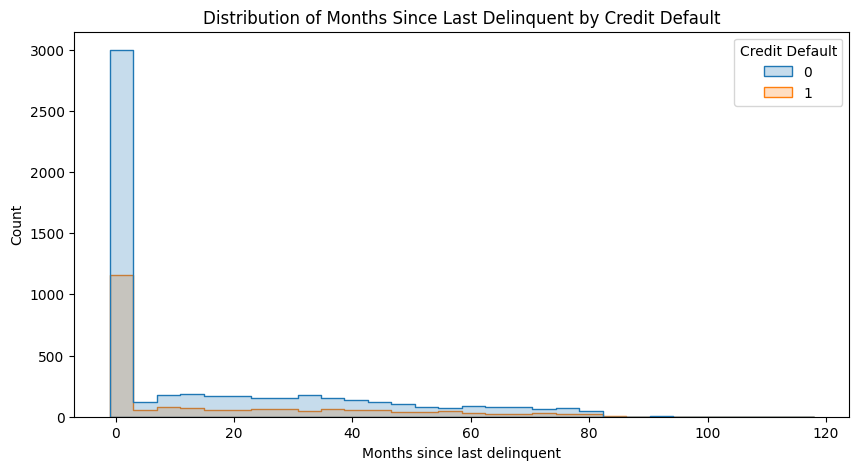

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(df, x="Months since last delinquent", hue="Credit Default", bins=30, element="step")
plt.title("Distribution of Months Since Last Delinquent by Credit Default")
plt.show()
# 透過下圖，會發現，從未逾期繳貸款的人，其實違約率也是蠻高的
# 我想計算，繳款預期預期0~50個月、50~100月、999(未逾期繳費人)違約比率

In [39]:
print(df.corr()) # 因為還有其他缺失值

ValueError: could not convert string to float: 'Own Home'

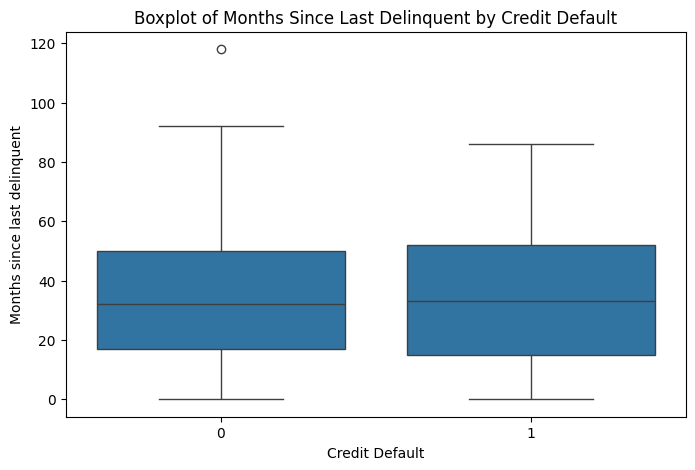

In [5]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Credit Default", y="Months since last delinquent")
plt.title("Boxplot of Months Since Last Delinquent by Credit Default")
plt.show()


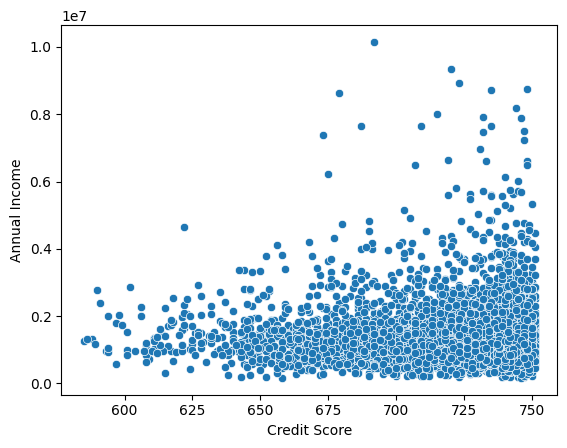

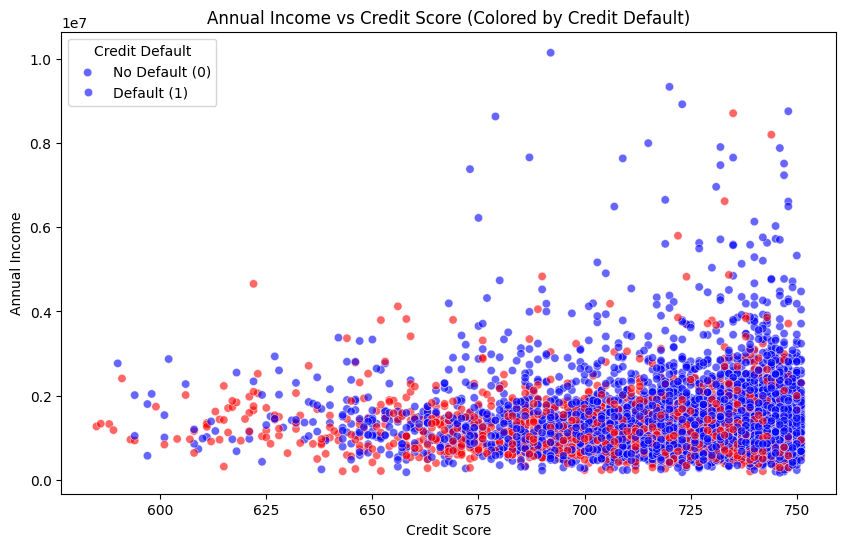

In [25]:
# 繪製散佈圖
sns.scatterplot(data=data, x='Credit Score', y='Annual Income')
plt.show()

# 繪製散點圖，區分違約與未違約
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Credit Score', y='Annual Income', hue='Credit Default', palette={0: "blue", 1: "red"}, alpha=0.6)

# 圖表標題與標籤
plt.title("Annual Income vs Credit Score (Colored by Credit Default)")
plt.xlabel("Credit Score")
plt.ylabel("Annual Income")
plt.legend(title="Credit Default", labels=["No Default (0)", "Default (1)"])

# 顯示圖表
plt.show()


In [5]:
print(df["Credit Score"].describe())
print(df["Credit Score"].unique())
# plt.hist(df["Credit Score"])


count    5943.000000
mean     1151.087498
std      1604.451418
min       585.000000
25%       711.000000
50%       731.000000
75%       743.000000
max      7510.000000
Name: Credit Score, dtype: float64
[ 749.  737.  742.  694.  719.   nan  745.  705.  706.  728.  748.  727.
  644.  695.  712.  697.  738.  720.  734.  740.  708.  726.  722.  750.
  670.  721.  729.  723.  716.  744.  707.  739.  714.  701.  735.  741.
  747.  743. 6470.  725.  718.  674.  746.  704. 7440.  673.  653. 7010.
 7320.  751.  711.  617.  730.  724.  624.  736. 7390.  667.  679.  732.
  693.  668.  731. 7140. 7470.  661.  709.  717.  678.  675.  700.  645.
  683. 7370.  733. 7040.  703.  660.  715.  654. 7430.  662.  687.  710.
  664.  688.  698.  702. 6940.  643.  659.  666. 7170.  681.  692. 7300.
  713.  627. 7500.  689. 6790.  696.  699.  672.  671. 7310.  651.  685.
  639. 7450. 7100.  669.  634.  658.  665. 7250.  642.  585. 7350. 7220.
  691. 7460. 7060.  682.  593.  686. 6110.  648. 7050. 7380. 7120. 

<Axes: >

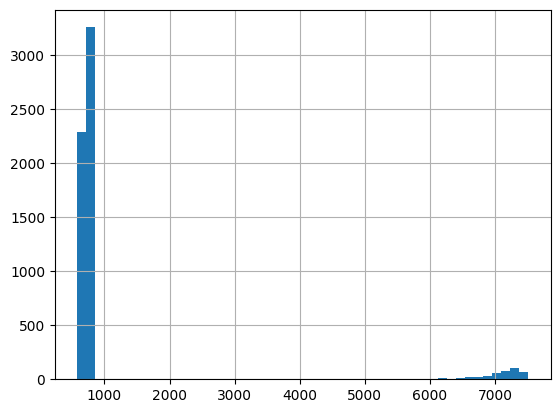

In [7]:
df[df['Credit Score'] > 1000]  # 查看異常數據
df['Credit Score'].hist(bins=50)  # 畫直方圖

In [ ]:
########## # 我發現，信用評分有個問題，數據有兩大區塊

In [34]:
if (df.loc[df['Credit Score'] > 1000, 'Credit Score'] % 10 == 0).all():
    print("全部都能整除10")
else:
    print("不是全部都整除10")


全部都能整除10


In [84]:
# 修改 'Credit Score'內容，將大於1000的都除10
df.loc[df['Credit Score'] > 1000, 'Credit Score'] /= 10
print(df['Credit Score'].describe())


count    5943.000000
mean      720.086993
std        27.957233
min       585.000000
25%       708.000000
50%       729.000000
75%       740.000000
max       751.000000
Name: Credit Score, dtype: float64


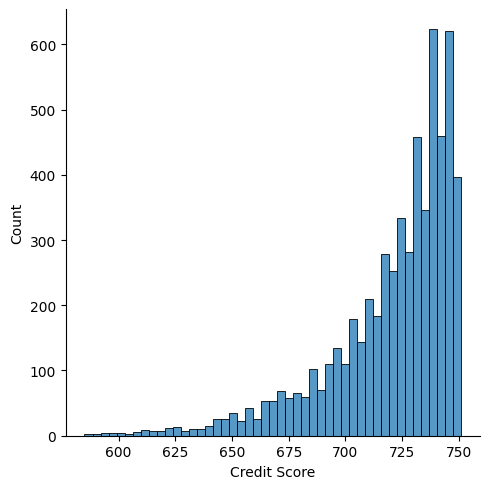

In [12]:
sns.displot(data=df, x='Credit Score')
plt.show()

In [14]:
corr_high_score = df[["Credit Score", "Credit Default"]].corr()
print(corr_high_score)

                Credit Score  Credit Default
Credit Score        1.000000       -0.207155
Credit Default     -0.207155        1.000000


In [15]:
df.groupby("Credit Default")["Credit Score"].describe()

,count,mean,std,min,25%,50%,75%,max
Credit Default,,,,,,,,
0,4359.0,723.577885,25.412545,590.0,713.0,732.0,742.0,751.0
1,1584.0,710.480429,32.094906,585.0,694.0,720.0,735.0,751.0


<Axes: xlabel='Credit Default', ylabel='Credit Score'>

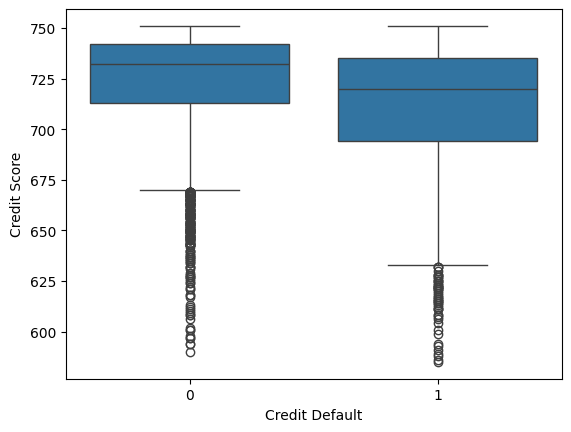

In [16]:
sns.boxplot(x="Credit Default", y="Credit Score", data=df)

C:\Users\gn012\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 68.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\gn012\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 25.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\gn012\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 80.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\gn012\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 49.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(ms

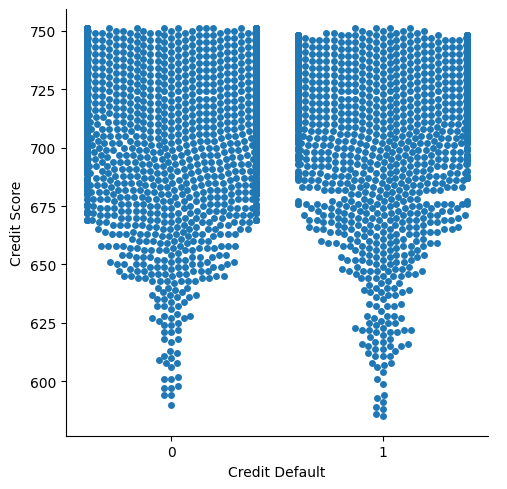

In [6]:
# df_high_score = df[df["Credit Score"] > 5000]
# corr_high_score = df_high_score[["Credit Score", "Credit Default"]].corr()
# print(corr_high_score)

# # plt.figure(figsize=(8, 5))
# # sns.boxplot(data=df_high_score, x="Credit Default", y="Credit Score")
# # plt.title("Boxplot of Credit Score (5000+) by Credit Default")
# # plt.show()

sns.catplot(data=df, kind="swarm", x="Credit Default", y="Credit Score")

In [20]:
data[["Annual Income","Current Loan Amount" , "Years of Credit History", "Credit Score", "Credit Default"]].corr()

,Annual Income,Current Loan Amount,Years of Credit History,Credit Score,Credit Default
Annual Income,1.000000,0.032082,0.186531,-0.037832,-0.101375
Current Loan Amount,0.032082,1.000000,0.010623,-0.108552,-0.226522
Years of Credit History,0.186531,0.010623,1.000000,-0.015683,-0.020567
Credit Score,-0.037832,-0.108552,-0.015683,1.000000,0.442050
Credit Default,-0.101375,-0.226522,-0.020567,0.442050,1.000000


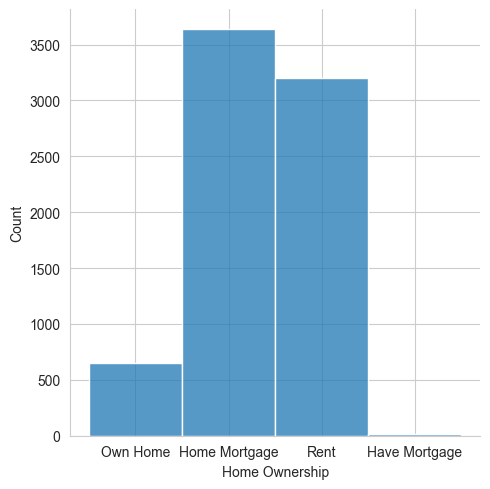

Home Ownership
Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: count, dtype: int64

In [50]:
# 畫出 房子是否為貸款還是租任 的直方圖，並分成四類
sns.displot(data=data, x='Home Ownership')
plt.show()
df['Home Ownership'].value_counts()

In [59]:
# Have Mortgage太少值將與Home Mortgage合併
df['Home Ownership'] = df['Home Ownership'].replace({'Have Mortgage': 'Home Mortgage'})
df['Home Ownership'].value_counts()

Home Ownership
Home Mortgage    3649
Rent             3204
Own Home          647
Name: count, dtype: int64

In [60]:
# 將類別數據化
df['Home Ownership'] = df['Home Ownership'].replace({
    'Home Mortgage': 1,
    'Rent': 2,
    'Own Home': 3,
}).astype(int)  # 明確轉換為整數
df['Home Ownership'].value_counts()

C:\Users\gn012\AppData\Local\Temp\ipykernel_21840\469700808.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Home Ownership'] = df['Home Ownership'].replace({


Home Ownership
1    3649
2    3204
3     647
Name: count, dtype: int64

In [164]:
# pairplot = sns.pairplot(data = data)

In [66]:
# pairplot.savefig("pairplot.png", dpi=300) 

In [66]:
# 數值化 Home Ownership
df['Home Ownership'] = df['Home Ownership'].map({'Rent': 0, 'Own Home': 1, 'Home Mortgage': 2})

# 計算 Debt-to-Income Ratio (DTI)
df['DTI'] = df['Monthly Debt'] / (df['Annual Income'] / 12)

# 計算 Credit Utilization Ratio
df['Credit Utilization'] = df['Current Credit Balance'] / df['Maximum Open Credit']

# 檢查數據是否成功轉換
print(df[['Home Ownership', 'DTI', 'Credit Utilization']].head())


   Home Ownership       DTI  Credit Utilization
0             1.0  0.196993            0.069080
1             1.0  0.214996            0.334232
2             2.0  0.218006            0.260809
3             1.0  0.168999            0.650305
4             0.0  0.110993            0.241836


In [37]:
df[['Home Ownership', 'DTI', 'Credit Utilization', "Credit Score", "Credit Default"]].corr()

,Home Ownership,DTI,Credit Utilization,Credit Score,Credit Default
Home Ownership,1.000000,0.005217,0.001664,0.035736,-0.065043
DTI,0.005217,1.000000,0.180095,-0.124423,0.137787
Credit Utilization,0.001664,0.180095,1.000000,-0.222794,0.088413
Credit Score,0.035736,-0.124423,-0.222794,1.000000,-0.207155
Credit Default,-0.065043,0.137787,0.088413,-0.207155,1.000000


In [70]:
df.head()

,Id,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,DTI,Credit Utilization
0,0,1.0,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0,0.196993,0.069080
1,1,1.0,1025487.0,10.0,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1,0.214996,0.334232
2,2,2.0,751412.0,8.0,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0,0.218006,0.260809
3,3,1.0,805068.0,6.0,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0,0.168999,0.650305
4,4,0.0,776264.0,8.0,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0,0.110993,0.241836


C:\Users\gn012\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 69.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\gn012\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\gn012\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 72.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\gn012\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 76.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(ms

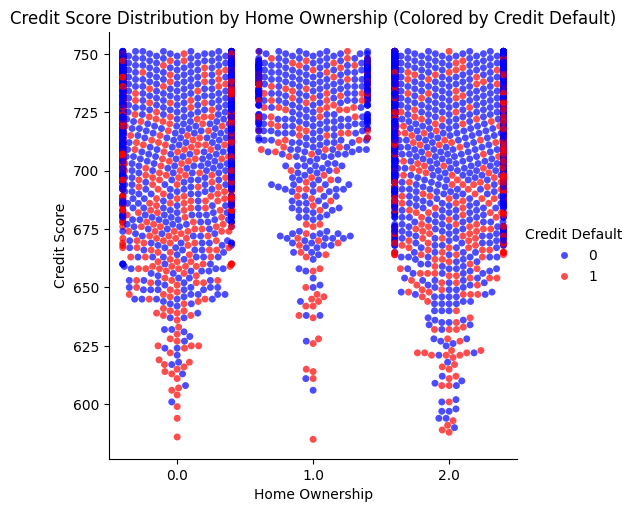

In [46]:
# 繪製 Swarm Plot
sns.catplot(
    data=df, kind="swarm", x="Home Ownership", y="Credit Score",
    hue="Credit Default", palette={0: "blue", 1: "red"}, alpha=0.7
)

# 顯示圖表
plt.title("Credit Score Distribution by Home Ownership (Colored by Credit Default)")
plt.show()

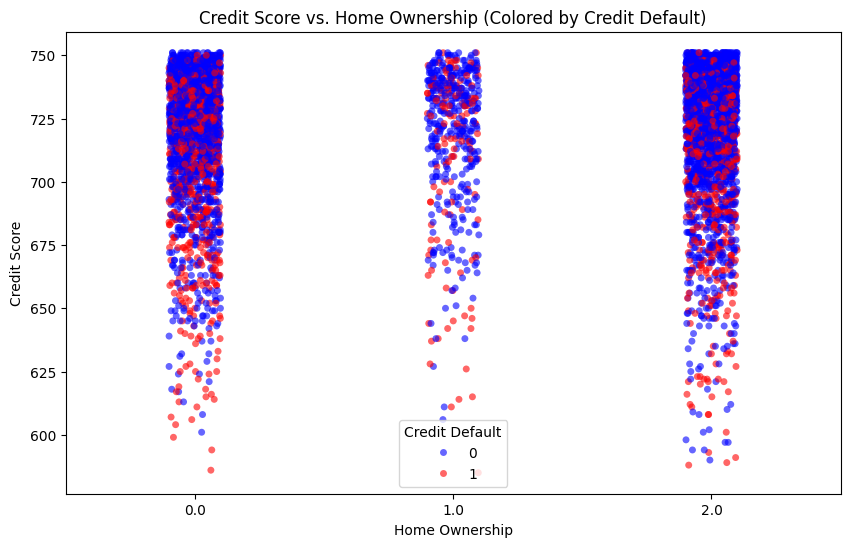

In [91]:
# 適合數據類型
plt.figure(figsize=(10, 6))
sns.stripplot(
    data=df, x="Home Ownership", y="Credit Score",
    hue="Credit Default", palette={0: "blue", 1: "red"},
    jitter=True, alpha=0.6
)
plt.title("Credit Score vs. Home Ownership (Colored by Credit Default)")
plt.show()

In [48]:
# 計算每種 Home Ownership 類別內的違約率
default_rates = df.groupby('Home Ownership')['Credit Default'].mean()
default_rates

Home Ownership
0.0    0.313046
1.0    0.296754
2.0    0.251856
Name: Credit Default, dtype: float64

In [97]:
df_n2 = df[
["Home Ownership", 
"Annual Income",
"Years in current job",
"Tax Liens",
"Number of Open Accounts", 
"Years of Credit History",
"Maximum Open Credit",
"Number of Credit Problems",
"Months since last delinquent",
"Bankruptcies", 
"Purpose",
"Term",
"Current Loan Amount", 
"Current Credit Balance", 
"Monthly Debt",
"DTI", 
"Credit Utilization",
"Credit Score", 
"Credit Default"]
]

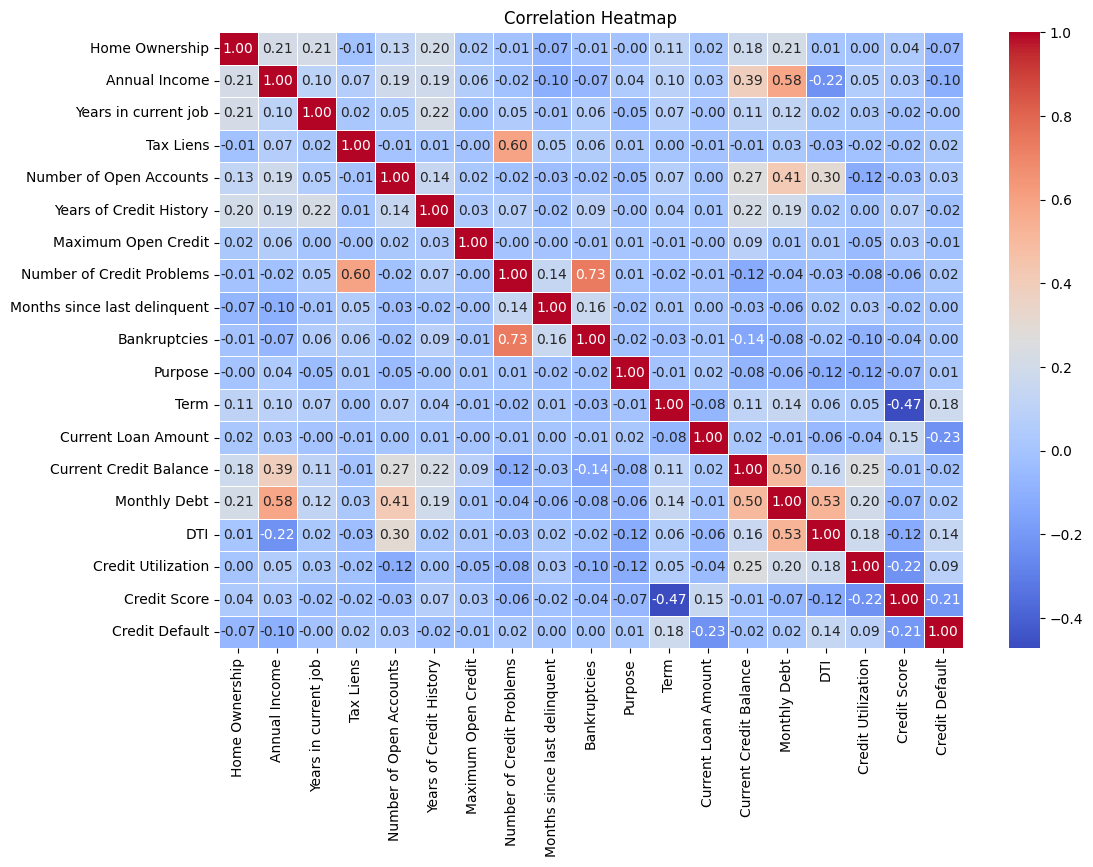

In [98]:
# 假設數據已經讀取成 DataFrame，命名為 df_n
plt.figure(figsize=(12, 8))
sns.heatmap(df_n2.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

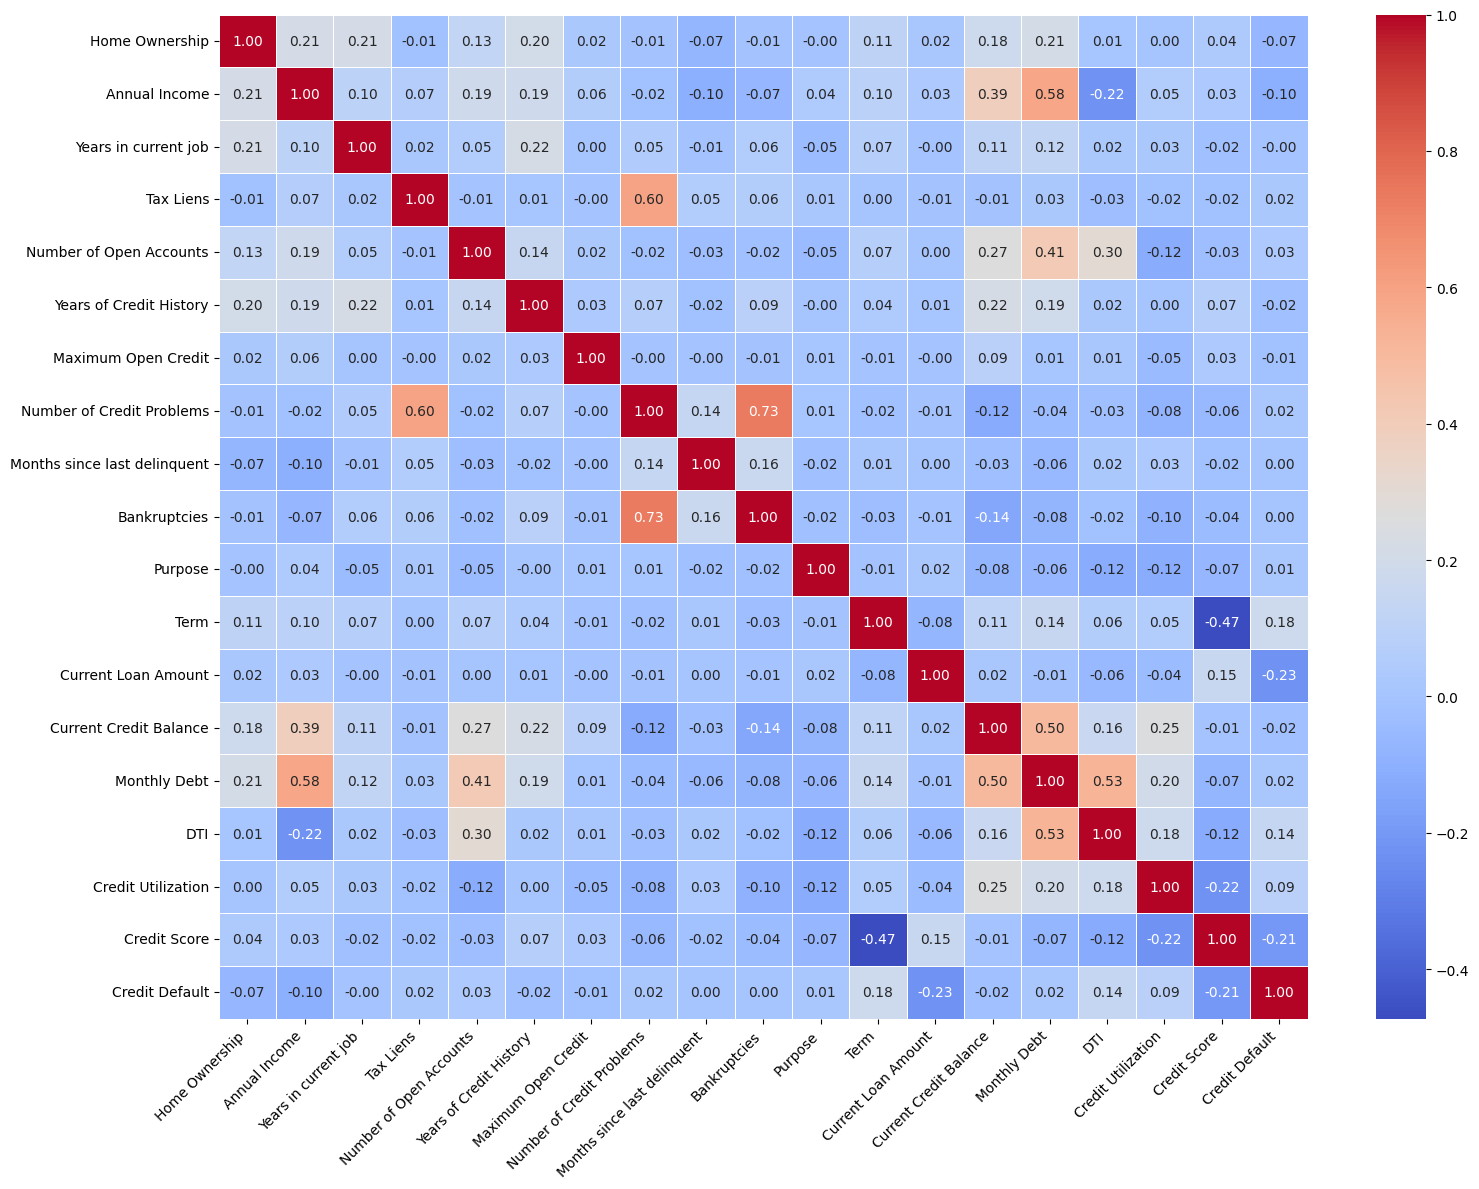

In [101]:
# 設定圖表大小
plt.figure(figsize=(16, 12))

# 繪製熱圖
ax = sns.heatmap(df_n2.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# 旋轉 X 軸標籤，確保不重疊
plt.xticks(rotation=45, ha="right")

# 確保圖表不會被裁剪
plt.tight_layout()

# 儲存圖片
plt.savefig("heatmap_fixed.png", dpi=300)

# 顯示圖片
plt.show()


In [102]:
correlation_with_default = df.corr()['Credit Default'].abs().sort_values(ascending=False)
print(correlation_with_default)


Credit Default                  1.000000
Current Loan Amount             0.226522
Credit Score                    0.207155
Term                            0.181487
DTI                             0.137787
Annual Income                   0.101375
Credit Utilization              0.088413
Home Ownership                  0.065043
Number of Open Accounts         0.028884
Tax Liens                       0.024368
Years of Credit History         0.020567
Number of Credit Problems       0.020088
Current Credit Balance          0.019522
Monthly Debt                    0.018480
Maximum Open Credit             0.014275
Id                              0.012858
Purpose                         0.012760
Years in current job            0.003973
Months since last delinquent    0.002598
Bankruptcies                    0.001648
Name: Credit Default, dtype: float64


In [126]:
df["Current Loan Amount"].value_counts()

Current Loan Amount
99999999.0    870
218064.0        6
89298.0         6
222926.0        5
265826.0        5
             ... 
351626.0        1
212498.0        1
187682.0        1
108922.0        1
26928.0         1
Name: count, Length: 5386, dtype: int64

In [112]:
df["Current Loan Amount"].nunique()

5386

In [113]:
df["Current Loan Amount"].isnull().sum()

0

In [125]:
df["Current Loan Amount"].describe()

count    7.500000e+03
mean     1.187318e+07
std      3.192612e+07
min      1.124200e+04
25%      1.801690e+05
50%      3.095730e+05
75%      5.198820e+05
max      1.000000e+08
Name: Current Loan Amount, dtype: float64

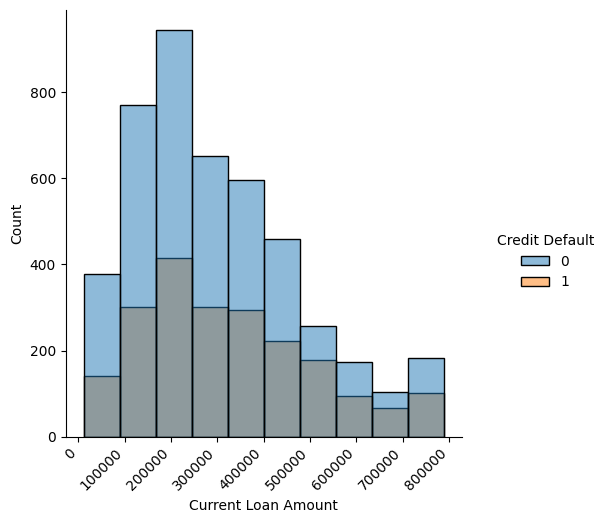

In [137]:
# 繪製貸款金額的分佈圖（去除極端異常值，以更好觀察主體分佈）

# 設定最大閾值，例如 99% 分位數
upper_limit = df["Current Loan Amount"].quantile(0.99)

# 過濾掉異常值
df_filtered = df[df["Current Loan Amount"] < upper_limit]

# 重新繪製直方圖
sns.displot(df_filtered, x="Current Loan Amount", bins=10, hue="Credit Default")
# 旋轉 X 軸標籤，確保不重疊
plt.xticks(rotation=45, ha="right")
plt.show()


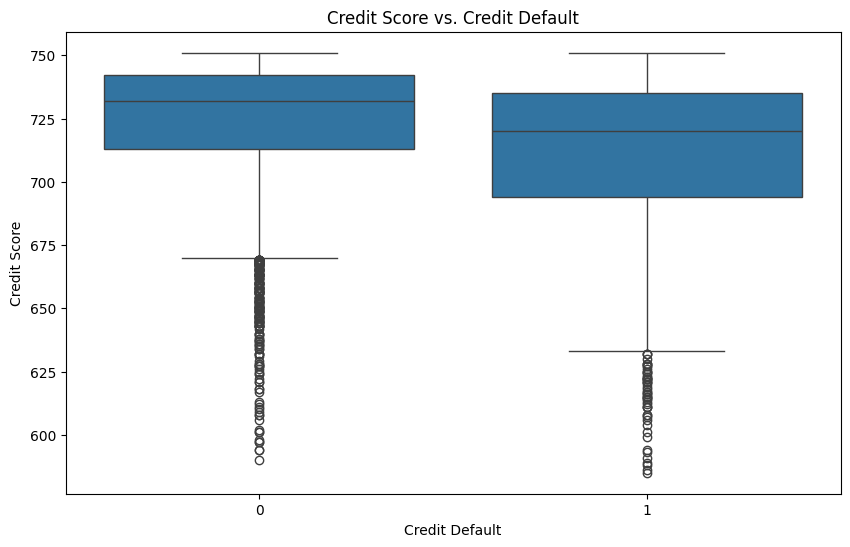

In [116]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_n2, x="Credit Default", y="Credit Score")
plt.title("Credit Score vs. Credit Default")
plt.show()


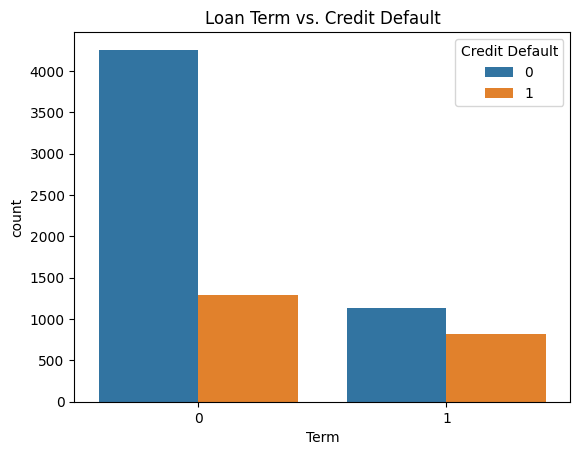

In [117]:
sns.countplot(data=df_n2, x="Term", hue="Credit Default")
plt.title("Loan Term vs. Credit Default")
plt.show()


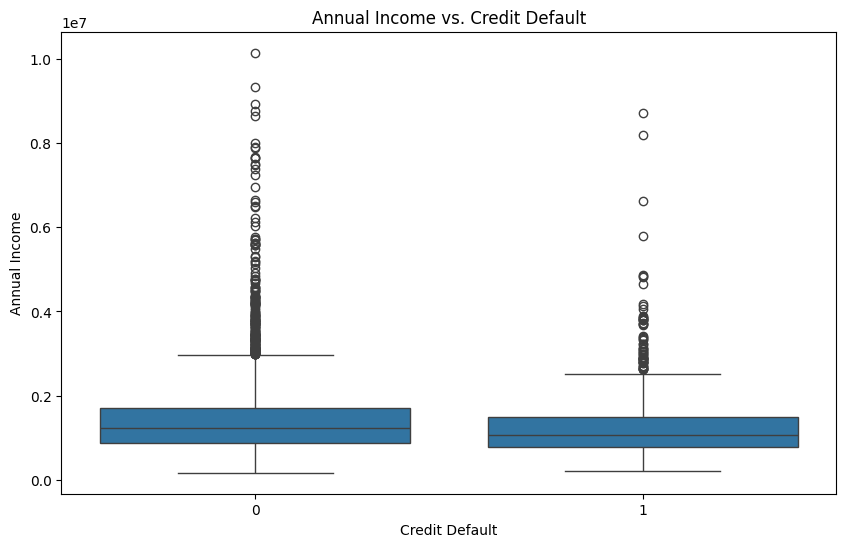

In [118]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_n2, x="Credit Default", y="Annual Income")
plt.title("Annual Income vs. Credit Default")
plt.show()


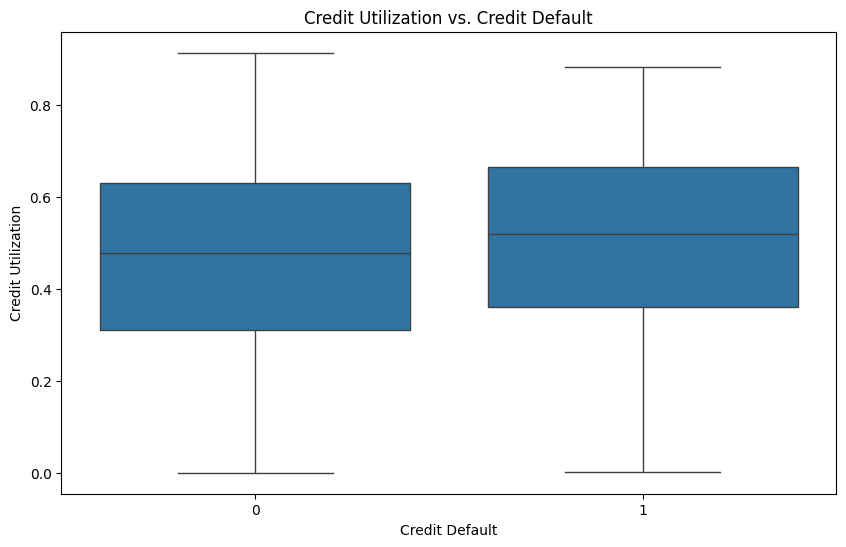

In [119]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_n2, x="Credit Default", y="Credit Utilization")
plt.title("Credit Utilization vs. Credit Default")
plt.show()


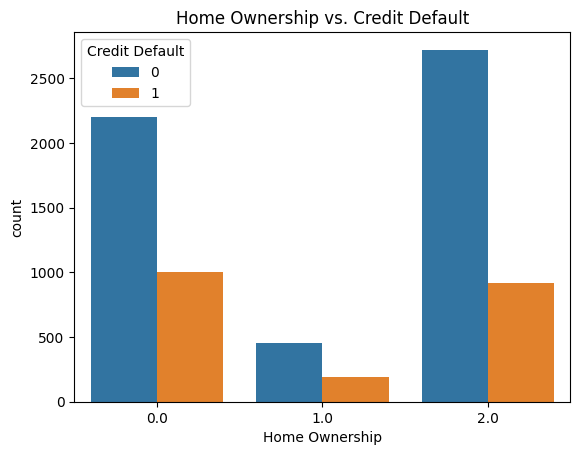

In [120]:
sns.countplot(data=df_n2, x="Home Ownership", hue="Credit Default")
plt.title("Home Ownership vs. Credit Default")
plt.show()


In [ ]:

#我明日要做個人專題貸款違約分析的報告，有了這些數據，我可以如何有邏輯，向業界的方式來製作